In [19]:
import pandas as pd
from tqdm import tqdm

In [20]:
def regression_score(mean_group):
    test = mean_group.reset_index()
    
    pos_empathy = 0
    pos_responsivness = 0
    pos_reliability = 0 
    pos_tangible = 0
    pos_assurance = 0

    neg_empathy = 0
    neg_responsivness= 0
    neg_reliability = 0
    neg_tangible = 0
    neg_assurance = 0


    for num in range(test.new_pos_neg.tolist()):
        #####긍정######
        if test['new_pos_neg'][num]=='긍정':
            if test['new_serv'][num]=='공감성':
                pos_empathy += (float(test['new_sent_score'][num]))
        # if test['pos_neg'][num]=='긍정':
            elif test['new_serv'][num]=='반응성':
                pos_responsivness += (float(test['new_sent_score'][num]))
        # if test['pos_neg'][num]=='긍정':
            elif test['new_serv'][num]=='신뢰성':
                pos_reliability += (float(test['new_sent_score'][num]))
        # if test['pos_neg'][num]=='긍정':
            elif test['new_serv'][num]=='유형성':
                pos_tangible += (float(test['new_sent_score'][num]))
        # if test['pos_neg'][num]=='긍정':
            elif test['new_serv'][num]=='확신성':
                pos_assurance += (float(test['new_sent_score'][num]))


        #####부정#####
        if test['new_pos_neg'][num]=='부정':
            if test['new_serv'][num]=='공감성':
                neg_empathy += (float(test['new_sent_score'][num]))
        # if test['pos_neg'][num]=='부정':
            elif test['new_serv'][num]=='반응성':
                neg_responsivness += (float(test['new_sent_score'][num]))
        # if test['pos_neg'][num]=='부정':
            elif test['new_serv'][num]=='신뢰성':
                neg_reliability += (float(test['new_sent_score'][num]))
        # if test['pos_neg'][num]=='부정':
            elif test['new_serv'][num]=='유형성':
                neg_tangible += (float(test['new_sent_score'][num]))
        # if test['pos_neg'][num]=='부정':
            elif test['new_serv'][num]=='확신성':
                neg_assurance += (float(test['new_sent_score'][num]))

    
    return pos_reliability, pos_responsivness, pos_assurance, pos_empathy, pos_tangible,  neg_reliability, neg_responsivness, neg_assurance, neg_empathy, neg_tangible

In [21]:
def regression_score(mean_group):
    test = mean_group.reset_index()

    empathy = 0
    responsivness= 0
    reliability = 0
    tangible = 0
    assurance = 0


    for num in range(len(test.new_serv.tolist())):
        #####긍정######
        if test['new_serv'][num]=='공감성':
            empathy += (float(test['new_sent_score'][num]))
        # if test['pos_neg'][num]=='긍정':
        elif test['new_serv'][num]=='반응성':
            responsivness += (float(test['new_sent_score'][num]))
        # if test['pos_neg'][num]=='긍정':
        elif test['new_serv'][num]=='신뢰성':
            reliability += (float(test['new_sent_score'][num]))
        # if test['pos_neg'][num]=='긍정':
        elif test['new_serv'][num]=='유형성':
            tangible += (float(test['new_sent_score'][num]))
        # if test['pos_neg'][num]=='긍정':
        elif test['new_serv'][num]=='확신성':
            assurance += (float(test['new_sent_score'][num]))


    
    return reliability, responsivness, assurance, empathy, tangible, 

In [22]:
def sentence_counter(score_df):
    test = score_df.reset_index()
    
    normal_sentence = 0
    reliability_sentence = 0
    responsivness_sentece =0
    assurance_sentence = 0
    empathy_sentece = 0
    tangible_sentece = 0


    for num in range(len(test)):
        if test['index'][num]=='일반문장':
            normal_sentence += (int(test['new_serv'][num]))
        if test['index'][num]=='신뢰성':
            reliability_sentence += (int(test['new_serv'][num]))
        if test['index'][num]=='반응성':
            responsivness_sentece += (int(test['new_serv'][num]))
        if test['index'][num]=='확신성':
            assurance_sentence += (int(test['new_serv'][num]))
        if test['index'][num]=='공감성':
            empathy_sentece += (int(test['new_serv'][num]))
        if test['index'][num]=='유형성':
            tangible_sentece += (int(test['new_serv'][num]))
        
    return normal_sentence, reliability_sentence, responsivness_sentece, assurance_sentence, empathy_sentece, tangible_sentece

#### **PREPROCESSING**

In [23]:
/pwd

'c:\\Users\\yukir\\Documents\\Monicas_workspace\\Derma\\FINAL_DERMA\\Regression'

In [24]:
data_org = pd.read_excel('result_2.xlsx',index_col=0)
data_org = data_org.drop_duplicates()
data_org = data_org.dropna()
print(data_org.shape)

(205049, 6)


In [25]:
def clean_text(x):
    x = x.replace("  ",'삭제')
    return x

In [26]:
data = data_org.copy()
data['reviews']  = data['reviews'].apply(clean_text)
data = data[data['reviews']!='삭제']
data.shape

(205049, 6)

In [27]:
data.head()

,hospital,star,reviews,new_serv,new_pos_neg,new_sent_score
0,오라클피부과의원 청주북문로점,6.8,저랑은 안맞는 거같아요,신뢰성,부정,0.85
1,오라클피부과의원 청주북문로점,6.8,의사선생님은 어떻게든 이유를 찾아주시려고 하는 거같은데,확신성,긍정,0.77
2,오라클피부과의원 청주북문로점,6.8,아무런,신뢰성,긍정,0.56
3,오라클피부과의원 청주북문로점,6.8,효과나 뭐없었어요,신뢰성,부정,0.75
5,오라클피부과의원 청주북문로점,6.8,느낌이어요멀리까지 찾아서 간건데 시간만 버린 거같아요,신뢰성,부정,0.92


In [28]:
score = []

for num, i in tqdm(enumerate(data['new_sent_score'].tolist())):
    if data['new_pos_neg'].tolist()[num] =='부정':
        x = float(data['new_sent_score'].tolist()[num])
        x= x  * (-1)
        score.append(x)
    else:
        score.append(data['new_sent_score'].tolist()[num])
        pass

data['new_sent_score'] = score

88335it [07:06, 207.31it/s]


KeyboardInterrupt: 

In [ ]:
data.to_excel('processed_result.xlsx')

In [ ]:
data = pd.read_excel('processed_result.xlsx', index_col=0)

In [ ]:
data.head()

,hospital,star,reviews,new_serv,new_pos_neg,new_sent_score
0,오라클피부과의원 청주북문로점,6.8,저랑은 안맞는 거같아요,신뢰성,부정,-0.85
1,오라클피부과의원 청주북문로점,6.8,의사선생님은 어떻게든 이유를 찾아주시려고 하는 거같은데,확신성,긍정,0.77
2,오라클피부과의원 청주북문로점,6.8,아무런,신뢰성,긍정,0.56
3,오라클피부과의원 청주북문로점,6.8,효과나 뭐없었어요,신뢰성,부정,-0.75
5,오라클피부과의원 청주북문로점,6.8,느낌이어요멀리까지 찾아서 간건데 시간만 버린 거같아요,신뢰성,부정,-0.92


In [ ]:
len(data.hospital.unique())

2182

In [ ]:
hos_star = data[['hospital', 'star']].drop_duplicates()
hos_list = hos_star['hospital'].tolist()
star_list = hos_star['star'].tolist()

print(len(hos_list))
print(len(star_list))

14755
14755


In [ ]:
condition = (data.hospital==hos_list[4]) & (data.star == star_list[4])
data[condition]

,hospital,star,reviews,new_serv,new_pos_neg,new_sent_score
28,예젤의원,10.0,흑자제거위해방문하였습니다인터넷으로 흑자제거검색하면서 원장님께서 쓰신 흑자관련포스팅을...,확신성,부정,-0.53


In [ ]:
review_score= pd.DataFrame(data[condition].groupby(['hospital', 'star','new_serv'])['new_sent_score'].mean())['new_sent_score'].mean()*10
review_score

-5.300000000000001

In [ ]:

score_df = pd.DataFrame(data[condition]['new_serv'].value_counts())
sentence_counter(score_df)

(0, 0, 0, 1, 0, 0)

In [ ]:
data[condition]
mean_group= pd.DataFrame(data[condition].groupby(['hospital', 'star','new_serv'])['new_sent_score'].mean())*10
mean_group.reset_index()

,hospital,star,new_serv,new_sent_score
0,예젤의원,10.0,확신성,-5.3


In [ ]:
mean_group['new_sent_score'].sum()

-5.300000000000001

In [ ]:
f = open('[0604]regression_score_value.txt','w')
for num in tqdm(range(len(hos_list))):
    hos = hos_list[num]
    hos = hos.replace(' ','')
    star = star_list[num]

    condition = (data.hospital==hos) & (data.star == star)
    # review_score= pd.DataFrame(data[condition].groupby(['hospital', 'star','new_serv'])['new_sent_score'].mean())['new_sent_score'].mean()*10
    mean_group= pd.DataFrame(data[condition].groupby(['hospital', 'star','new_serv'])['new_sent_score'].mean())*10
    
    

    score_df = pd.DataFrame(data[condition]['new_serv'].value_counts())
    n_s, r_s, rp_s, as_s, em_s, tan_s = sentence_counter(score_df)
    

    r, rp, assu, em, tan = regression_score(mean_group)
    line_ = hos+';'+str(star)+';'\
        +str(r)+';'+str(rp)+';'+str(assu)+';'+str(em)+';'+str(tan)+';' \
            +str(n_s)+';'+str(r_s)+';'+ str(rp_s)+';'+str(as_s)+';'+str(em_s)+';'+str(tan_s)
    f.write(line_+'\n')
f.close()

 13%|█▎        | 1986/14755 [00:25<02:46, 76.85it/s]


KeyboardInterrupt: 

In [ ]:
f = open('[0604]regression_score_value.txt', 'r')
lines = f.readlines()

hos, star = [],[]
r, rp, assu, em, tan  = [],[],[],[],[]
n_s, r_s, rp_s, as_s, em_s, tan_s = [],[],[],[],[],[]

for i in lines:
    i = i.replace('\n','')
    p = i.split(';')
    hos.append(p[0])
    star.append(p[1])

    r.append(p[2])
    rp.append(p[3])
    assu.append(p[4])
    em.append(p[5])
    tan.append(p[6])

    n_s.append(p[7])
    r_s.append(p[8])
    rp_s.append(p[9])
    as_s.append(p[10])
    em_s.append(p[11])
    tan_s.append(p[12])
regression_df = pd.DataFrame({'hos':hos, 'star':star, 'r':r, 'rp':rp, 'assu':assu, 'em':em, 'tan':tan, 'n_s':n_s, 'r_s':r_s, 'rp_s':rp_s,'as_s':as_s, 'em_s':em_s, 'tan_s':tan_s})
regression_df.head()

In [ ]:
regression_df.to_excel('[0604]regression_df.xlsx')

### **DATA_LOAD**

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
regression_df = pd.read_excel('[0604]regression_df.xlsx', index_col=0, )

In [4]:
regression_df.head()

,hos,star,r,rp,assu,em,tan,n_s,r_s,rp_s,as_s,em_s,tan_s,review_len
0,오라클피부과의원청주북문로점,6.8,0.000000,0.0,0.0,0.0,0.000000,0,0,0,0,0,0,96
1,소담피부과의원,5.3,-3.733333,-9.8,0.0,9.6,5.500000,0,3,1,0,1,1,119
2,김홍희탱글의원,4.5,0.000000,0.0,-9.5,0.0,0.000000,0,0,0,1,0,0,84
3,유니온피부과의원,5.5,-2.020000,8.7,5.6,-10.0,2.133333,0,10,1,1,1,6,401
4,예젤의원,10.0,0.000000,0.0,-5.3,0.0,0.000000,0,0,0,1,0,0,94


In [5]:
regression_df['count_sent'] = regression_df['n_s']+regression_df['r_s']+regression_df['rp_s']+regression_df['as_s']+regression_df['em_s']+regression_df['tan_s']

In [6]:
data = regression_df[['hos', 'star', 'r', 'rp','assu', 'em', 'tan', 'count_sent']]

In [7]:
import numpy as np

In [8]:
print(data.shape)
data = data.replace(0, np.nan)
data = data.dropna()

print(data.shape)

(14755, 8)
(2284, 8)


In [9]:
len(regression_df.hos.unique())

2171

In [10]:
### 모든 점수가 있는 것만 통계 돌려보기

#### **REGRESSION**

In [11]:
import pandas as pd
import numpy as np
import openpyxl

import scipy as sp
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

%precision 3
#matplotlib inline

'%.3f'

In [12]:
data.head()

,hos,star,r,rp,assu,em,tan,count_sent
3,유니온피부과의원,5.5,-2.020000,8.700000,5.600000,-10.000000,2.133333,19.0
6,라인피부과의원,10.0,2.438462,-0.500000,7.483333,4.875000,7.181818,61.0
10,연세조이의원,10.0,0.777778,4.975000,6.250000,-0.250000,0.733333,68.0
15,아름다운피부과의원,9.5,3.473333,1.269231,6.994444,4.535714,3.615152,171.0
22,아름다운피부과의원,10.0,4.285281,1.686047,6.676744,3.915152,3.067143,463.0


In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12


In [14]:
data.count_sent.describe()

count    2284.000000
mean       28.490368
std        25.553109
min         5.000000
25%        14.000000
50%        22.000000
75%        34.000000
max       463.000000
Name: count_sent, dtype: float64

In [15]:
X_data= data.drop(columns=['star','hos'])
target = data['star']
#  for b0, 상수항 추가
x_data1 = sm.add_constant(X_data, has_constant = "add")
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

c:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   star   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     100.9
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          6.96e-113
Time:                        22:15:58   Log-Likelihood:                -3783.9
No. Observations:                2284   AIC:                             7582.
Df Residuals:                    2277   BIC:                             7622.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4389      0.058    128.032      0.000       7.325       7.553
r              0.0919      0.008     11.308      0.000       0.076       0.108
rp             0.0115      0.004      2.968      0.003       0.004       0.019
assu           0.0728      0.007     10.470      0.000       0.059       0.086
em             0.0304      0.004      7.455      0.000       0.022       0.038
tan            0.0296      0.006      5.261      0.000       0.019       0.041
count_sent     0.0118      0.001     11.320      0.000       0.010       0.014
==============================================================================
Omnibus:                      362.938   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.189
Skew:                          -1.004   Prob(JB):                    6.50e-142
Kurtosis:                       4.674   Cond. No.                         84.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
multi_model.exog_names

['const', 'r', 'rp', 'assu', 'em', 'tan', 'count_sent']

In [18]:
variance_inflation_factor(multi_model.exog, 1)

1.0434000845837306

In [19]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(multi_model.exog, i)} 
             for i, column in enumerate(multi_model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,const,4.777580
1,r,1.043400
2,rp,1.004037
3,assu,1.020215
4,em,1.018342
5,tan,1.019543
6,count_sent,1.012069


In [20]:
from numpy import linalg 
ba = linalg.inv(np.dot(x_data1.T, x_data1))   #inverse matrix in python
np.dot(np.dot(ba, x_data1.T),target)

array([7.439, 0.092, 0.012, 0.073, 0.03 , 0.03 , 0.012])

In [21]:
## review_len

X_data= data.drop(columns=['star','hos'])
target = data['star']
#  for b0, 상수항 추가
x_data1 = sm.add_constant(X_data, has_constant = "add")
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

c:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   star   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     100.9
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          6.96e-113
Time:                        22:16:00   Log-Likelihood:                -3783.9
No. Observations:                2284   AIC:                             7582.
Df Residuals:                    2277   BIC:                             7622.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4389      0.058    128.032      0.000       7.325       7.553
r              0.0919      0.008     11.308      0.000       0.076       0.108
rp             0.0115      0.004      2.968      0.003       0.004       0.019
assu           0.0728      0.007     10.470      0.000       0.059       0.086
em             0.0304      0.004      7.455      0.000       0.022       0.038
tan            0.0296      0.006      5.261      0.000       0.019       0.041
count_sent     0.0118      0.001     11.320      0.000       0.010       0.014
==============================================================================
Omnibus:                      362.938   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.189
Skew:                          -1.004   Prob(JB):                    6.50e-142
Kurtosis:                       4.674   Cond. No.                         84.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variance_inflation_factor(multi_model.exog, 1)

1.0434000845837306

In [23]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(multi_model.exog, i)} 
             for i, column in enumerate(multi_model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,const,4.777580
1,r,1.043400
2,rp,1.004037
3,assu,1.020215
4,em,1.018342
5,tan,1.019543
6,count_sent,1.012069


In [24]:
### 베타값
# 
from numpy import linalg 
ba = linalg.inv(np.dot(x_data1.T, x_data1))   #inverse matrix in python
a, r_w, rp_w, as_w, em_w, tan_w, s_c = np.dot(np.dot(ba, x_data1.T),target)
print(r_w, rp_w, as_w, em_w, tan_w, s_c)

0.09191201544822442 0.011529331617661741 0.07280399045053494 0.03041275242233699 0.02959143058936596 0.01184936782320872


In [25]:
np.dot(np.dot(ba, x_data1.T),target)

array([7.439, 0.092, 0.012, 0.073, 0.03 , 0.03 , 0.012])

In [26]:
data.head(2)

,hos,star,r,rp,assu,em,tan,count_sent
3,유니온피부과의원,5.5,-2.020000,8.7,5.600000,-10.000,2.133333,19.0
6,라인피부과의원,10.0,2.438462,-0.5,7.483333,4.875,7.181818,61.0


In [27]:
### Weighted
data['r']  = data['r']*r_w 
data['rp'] = data['rp']*rp_w
data['assu'] = data['assu']*as_w
data['em'] = data['em'] *em_w
data['tan_w'] = data['tan']*tan_w
data['count_sent'] = data['count_sent']*s_c

In [28]:
data.head()

,hos,star,r,rp,assu,em,tan,count_sent,tan_w
3,유니온피부과의원,5.5,-0.185662,0.100305,0.407702,-0.304128,2.133333,0.225138,0.063128
6,라인피부과의원,10.0,0.224124,-0.005765,0.544817,0.148262,7.181818,0.722811,0.212520
10,연세조이의원,10.0,0.071487,0.057358,0.455025,-0.007603,0.733333,0.805757,0.021700
15,아름다운피부과의원,9.5,0.319241,0.014633,0.509223,0.137944,3.615152,2.026242,0.106978
22,아름다운피부과의원,10.0,0.393869,0.019439,0.486094,0.119071,3.067143,5.486257,0.090761


### **MSE_가중합산 후**

In [29]:
import pandas as pd
import numpy as np

In [30]:
def minus_scoring(x):
    if x<=0:
        x=1
    elif x>=10:
        x = 10
    return x


In [31]:
data.head()

,hos,star,r,rp,assu,em,tan,count_sent,tan_w
3,유니온피부과의원,5.5,-0.185662,0.100305,0.407702,-0.304128,2.133333,0.225138,0.063128
6,라인피부과의원,10.0,0.224124,-0.005765,0.544817,0.148262,7.181818,0.722811,0.212520
10,연세조이의원,10.0,0.071487,0.057358,0.455025,-0.007603,0.733333,0.805757,0.021700
15,아름다운피부과의원,9.5,0.319241,0.014633,0.509223,0.137944,3.615152,2.026242,0.106978
22,아름다운피부과의원,10.0,0.393869,0.019439,0.486094,0.119071,3.067143,5.486257,0.090761


In [32]:
data['predicted_score'] = (data['r']+data['rp']+data['assu']+data['em']+data['tan']+data['count_sent'])/6
data['predicted_score'] = data['predicted_score'].apply(minus_scoring) 
data.head()

,hos,star,r,rp,assu,em,tan,count_sent,tan_w,predicted_score
3,유니온피부과의원,5.5,-0.185662,0.100305,0.407702,-0.304128,2.133333,0.225138,0.063128,0.396115
6,라인피부과의원,10.0,0.224124,-0.005765,0.544817,0.148262,7.181818,0.722811,0.212520,1.469345
10,연세조이의원,10.0,0.071487,0.057358,0.455025,-0.007603,0.733333,0.805757,0.021700,0.352560
15,아름다운피부과의원,9.5,0.319241,0.014633,0.509223,0.137944,3.615152,2.026242,0.106978,1.103739
22,아름다운피부과의원,10.0,0.393869,0.019439,0.486094,0.119071,3.067143,5.486257,0.090761,1.595312


In [33]:
data['predicted_score'].describe()

count    2284.000000
mean        0.982742
std         0.462890
min         0.000811
25%         0.663761
50%         1.000000
75%         1.355147
max         1.966464
Name: predicted_score, dtype: float64

In [34]:
data['predicted_score'].median()

1.000

In [33]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(data['star'], data['predicted_score']) 
np.sqrt(MSE)

7.69037209033151

In [345]:
data.to_excel('regression_result_v2.xlsx')

#### 가중평균 한 값

,hos,star,r,rp,assu,em,tan
3,유니온피부과의원,5.5,-2.020000,8.700000,5.600000,-10.000000,2.133333
6,라인피부과의원,10.0,2.438462,-0.500000,7.483333,4.875000,7.181818
10,연세조이의원,10.0,0.777778,4.975000,6.250000,-0.250000,0.733333
15,아름다운피부과의원,9.5,3.473333,1.269231,6.994444,4.535714,3.615152
22,아름다운피부과의원,10.0,4.285281,1.686047,6.676744,3.915152,3.067143


#### **REGRESSION**

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [125]:
data.head(3)

,hos,star,r,rp,assu,em,tan,count_sent
3,유니온피부과의원,5.5,-2.020000,8.700,5.600000,-10.000,2.133333,19.0
6,라인피부과의원,10.0,2.438462,-0.500,7.483333,4.875,7.181818,61.0
10,연세조이의원,10.0,0.777778,4.975,6.250000,-0.250,0.733333,68.0


In [374]:
data = data.drop(columns='predicted_score')

In [126]:
corr_matrix = data.corr()

# 타겟값을 기준으로 관계가 높은 다른 특성들을 정렬해서 역순으로 나열해봅시다.

corr_matrix["star"].sort_values(ascending=False)

star          1.000000
r             0.285154
count_sent    0.251103
assu          0.246264
em            0.193483
tan           0.154909
rp            0.082230
Name: star, dtype: float64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

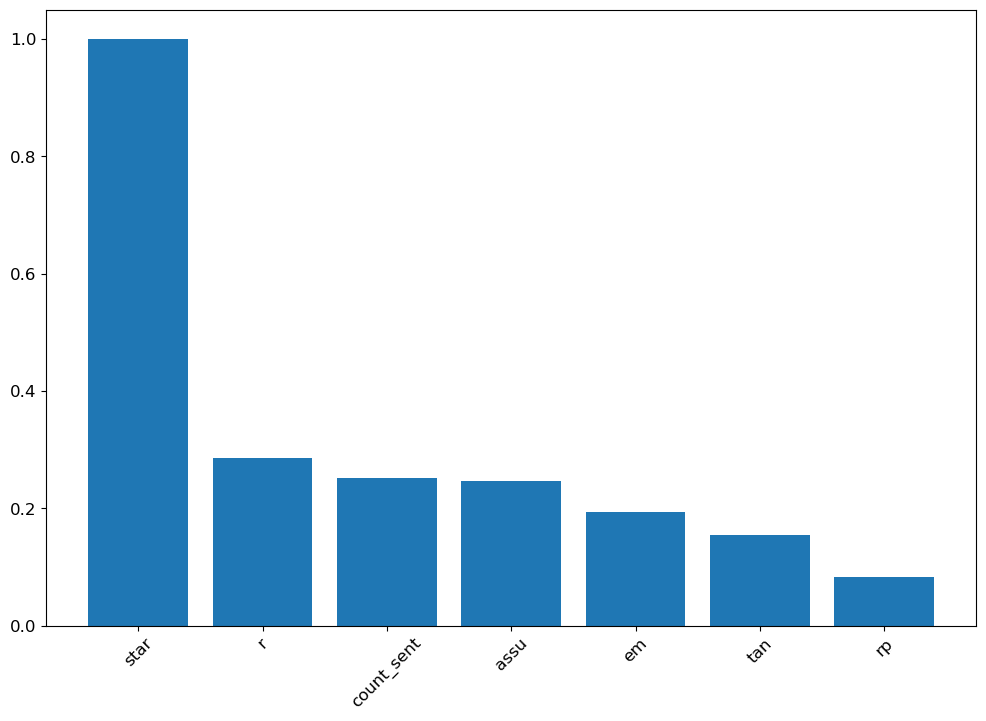

In [127]:
corr_df = pd.DataFrame(corr_matrix["star"].sort_values(ascending=False))

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.bar(corr_df.index, corr_df["star"])
plt.xticks(rotation=45)

array([[<AxesSubplot:xlabel='star', ylabel='star'>,
        <AxesSubplot:xlabel='r', ylabel='star'>,
        <AxesSubplot:xlabel='rp', ylabel='star'>,
        <AxesSubplot:xlabel='assu', ylabel='star'>,
        <AxesSubplot:xlabel='em', ylabel='star'>,
        <AxesSubplot:xlabel='tan', ylabel='star'>,
        <AxesSubplot:xlabel='count_sent', ylabel='star'>],
       [<AxesSubplot:xlabel='star', ylabel='r'>,
        <AxesSubplot:xlabel='r', ylabel='r'>,
        <AxesSubplot:xlabel='rp', ylabel='r'>,
        <AxesSubplot:xlabel='assu', ylabel='r'>,
        <AxesSubplot:xlabel='em', ylabel='r'>,
        <AxesSubplot:xlabel='tan', ylabel='r'>,
        <AxesSubplot:xlabel='count_sent', ylabel='r'>],
       [<AxesSubplot:xlabel='star', ylabel='rp'>,
        <AxesSubplot:xlabel='r', ylabel='rp'>,
        <AxesSubplot:xlabel='rp', ylabel='rp'>,
        <AxesSubplot:xlabel='assu', ylabel='rp'>,
        <AxesSubplot:xlabel='em', ylabel='rp'>,
        <AxesSubplot:xlabel='tan', ylabel='rp'>,
   

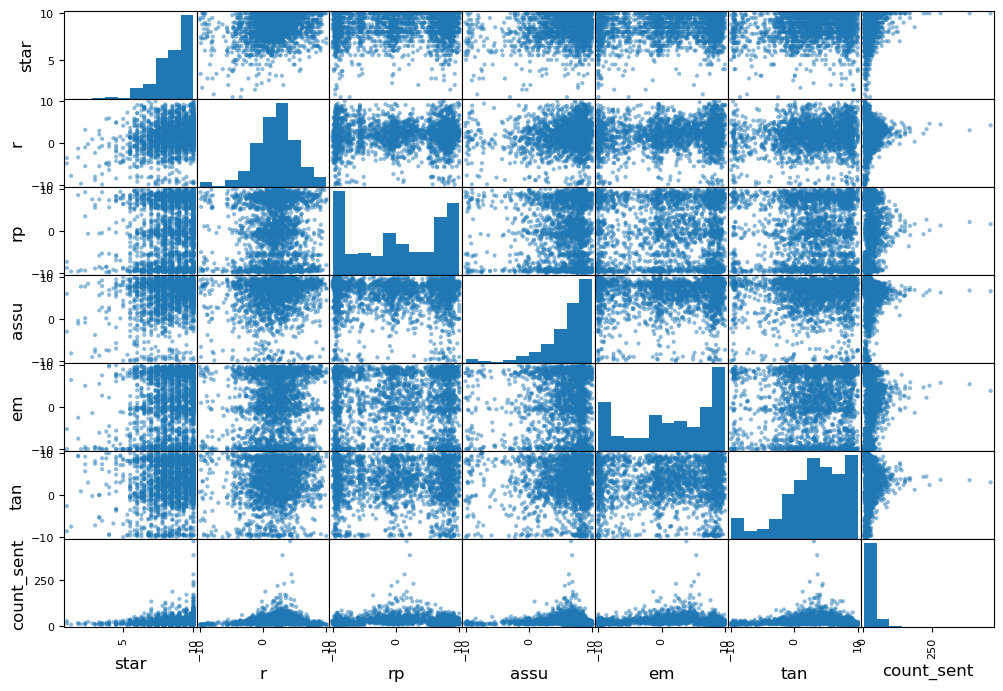

In [128]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(12, 8))

In [123]:
X = data.drop(columns=['star', 'hos'])
y = data['star']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1337)

NameError: name 'train_test_split' is not defined

In [353]:
mlr = LinearRegression()
mlr.fit(X_train, y_train) 

LinearRegression()

In [355]:
y_predict = mlr.predict(X_valid)

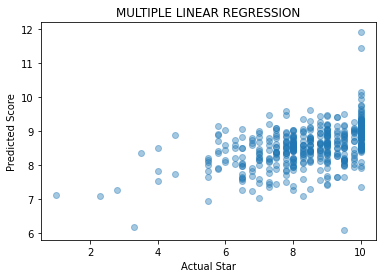

In [360]:
import matplotlib.pyplot as plt
plt.scatter(y_valid, y_predict, alpha=0.4)
plt.xlabel("Actual Star")
plt.ylabel("Predicted Score")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [122]:
plt.plot(mlr.predict(X_valid[:50]), label="predict")
plt.plot(y_valid[:50].values.reshape(-1, 1), label="real star")
plt.legend()

NameError: name 'mlr' is not defined

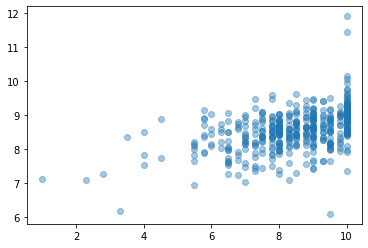

In [372]:
y_predict = mlr.predict(X_valid)

plt.scatter(y_valid, y_predict, alpha = 0.4)
plt.show()

In [368]:
print(mlr.score(X_train, y_train))

0.21291106999349507


In [377]:
importance = mlr.featurn_importances_

AttributeError: 'LinearRegression' object has no attribute 'featurn_importances_'